<H1>Exploratory Data Analysis </h1><br>Our main goal is to know what variables influence the dependant variable the most.We will undercover relationships between variables.


In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv('clean_df.csv')


<H2>Descriptive Statistics

In [2]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,117.120000,98.756585,0.836373,0.467317,-5.372396e-16,2555.565854,126.907317,3.328484,3.254183,10.142537,104.246234,5124.881618,25.219512,30.751220,13202.101059,0.097561,0.902439,0.819512,0.180488
std,1.245307,33.157365,6.021776,0.059285,0.178767,1.000000e+00,520.680204,41.642693,0.270993,0.313721,3.972040,39.519338,477.004538,6.542142,6.886443,7868.849339,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.000000,-2.424729e+00,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,97.600000,94.500000,0.799135,0.316667,-7.058983e-01,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,103.000000,97.000000,0.832292,0.433333,1.535169e-01,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.550000,7.264604e-01,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,2.486215e+00,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

<h3>Box Plot

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

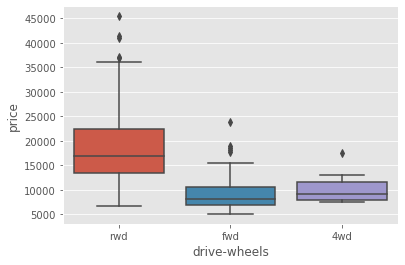

In [5]:
sns.boxplot(x='drive-wheels',y='price',data=df)

<h3> Scatter Plot

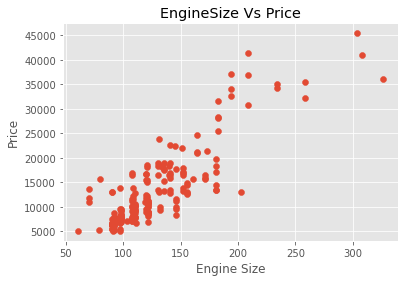

In [6]:
plt.scatter(df['engine-size'],df['price'])
plt.title('EngineSize Vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

<h3> GroupBy

In [7]:
test = df[['drive-wheels','body-style','price']]
grp = test.groupby(['drive-wheels','body-style'],as_index=False).mean()  
grp

,drive-wheels,body-style,price
0,4wd,hatchback,10276.214634
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9921.892255
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<h3>Pivot

In [8]:
pvt = grp.pivot(index='drive-wheels',columns='body-style')
pvt

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10276.214634  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9921.892255   
rwd              23949.6  24202.714286  14264.706804  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h4>Heat Maps

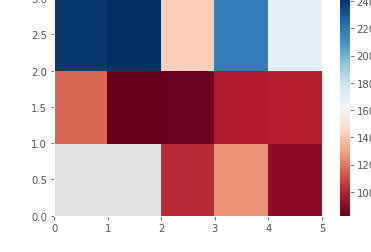

In [9]:
plt.pcolor(pvt,cmap='RdBu')
plt.colorbar()
plt.show()

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

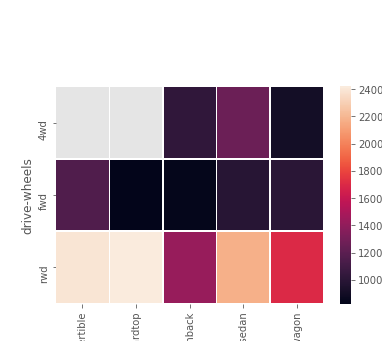

In [10]:
sns.heatmap(pvt,  linewidths=.5)

<h2> Correlation

(1.0, 48131.06950256121)

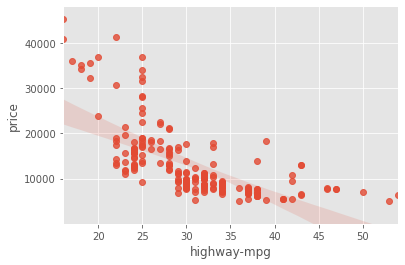

In [11]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(1,)

This is -ve correlation b/w the variables.<br>The Slop of line determines how well the variables are related(both +ve and -ve).

<h2>PEARSON CORRELATION</h2><br>Pearson correation gives us 2 values to determine how well two variables are interdependant.

1.<u>Correlation Coefficient</u><br>
  ~ 1:Large +ve correlation<br>~ 0:No correlation<br>~-1:Large -ve correlation<br>
2.<u>P-Value</u><br>
(<0.001): Strong certainity of results<br>
(<0.05 ): Mmoderate certainity of results<br>
(<0.1   ): Week certainity of results<br>
(>0.1   ): No certainity of results


In [12]:
import scipy.stats as st

In [13]:
(a,b) = st.pearsonr(df['horsepower'],df['price'])
print('Pearson coefficient of correlation:%.10f'%a)
print('P-Value:%.4g'%b)

Pearson coefficient of correlation:0.7573278315
P-Value:1.99e-39


<h3> Correlation Heat Map

In [14]:
c_matrix = df.corr()
c_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
symboling,1.000000,0.424779,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.138187,-0.015591,-0.178515,0.071355,0.273528,-0.035823,0.034606,-0.082028,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.424779,1.000000,-0.112216,-0.068480,-0.004775,-0.342213,-0.017111,-0.021093,-0.099301,0.015207,-0.111747,0.074035,0.243177,-0.114170,-0.076102,-0.002453,-0.109048,0.109048,0.021489,-0.021489
wheel-base,-0.531954,-0.112216,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.491189,0.163159,0.249786,0.352068,-0.360231,-0.470414,-0.544082,0.583379,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,-0.068480,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608051,0.131096,0.158414,0.554328,-0.287440,-0.670909,-0.704662,0.683376,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,-0.004775,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559298,0.183252,0.181129,0.642118,-0.220155,-0.642704,-0.677218,0.728409,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.342213,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.178942,-0.048628,0.261214,-0.110046,-0.320217,-0.048640,-0.107358,0.134938,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,-0.017111,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649429,0.169817,0.151362,0.750983,-0.266198,-0.757414,-0.797465,0.820823,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,-0.021093,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.589617,0.208201,0.028971,0.810679,-0.244712,-0.653658,-0.677470,0.861719,0.069594,-0.069594,-0.108217,0.108217
bore,-0.138187,-0.099301,0.491189,0.608051,0.559298,0.178942,0.649429,0.589617,1.000000,-0.054923,0.006077,0.574671,-0.263725,-0.578099,-0.581376,0.532221,0.055969,-0.055969,-0.214706,0.214706
stroke,-0.015591,0.015207,0.163159,0.131096,0.183252,-0.048628,0.169817,0.208201,-0.054923,1.000000,0.186774,0.087182,-0.076210,-0.037023,-0.039475,0.082303,0.243027,-0.243027,-0.224741,0.224741


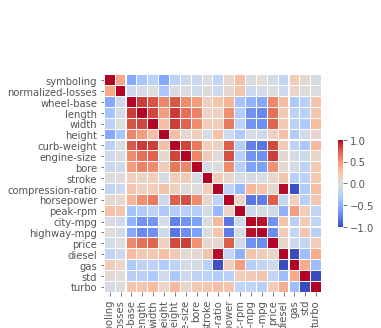

In [15]:
f, ax = plt.subplots() 
heatmap = sns.heatmap(c_matrix, 
                      square = True,
                      linewidths = .1,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(c_matrix.columns, rotation = 0)
ax.set_xticklabels(c_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<h2> ANOVA</h2><br>Analysis of Variance

In [24]:
df_anova = df[['make','price']]
g_anova = df_anova.groupby(['make'])

In [29]:
import scipy as sp
results_1 = sp.stats.f_oneway(g_anova.get_group('honda')['price'],g_anova.get_group('subaru')['price'])
results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [31]:
results_2 = sp.stats.f_oneway(g_anova.get_group('honda')['price'],g_anova.get_group('jaguar')['price'])
results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)